# Проверка системы сплитования. ДЗ в рамках курса Karpov "Симулятор аналитика"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from read_db.CH import Getch

In [2]:
#Собираем данные
data = Getch('''
    select user_id,
            exp_group,
            countIf(action = 'view') as views, 
            countIf(action = 'like') as likes, 
            likes/views as CTR
from {db}.feed_actions 
where toDate(time) between '2021-11-08' and '2021-11-14' 
        and exp_group in (2,3)
group by user_id, exp_group
        ''').df

In [12]:
#напишем функцию, которая проверяет процент p values, которые меньше либо равны 0.05
def get_pvalue(n, k, df = data, sample = 500, n_samples = 10000):
    pvalues_list = []
    for i in range(n_samples):
        resample_data_n = df.CTR.loc[df.exp_group == n].sample(sample, replace = True)
        resample_data_k = df.CTR.loc[df.exp_group == k].sample(sample, replace = True)
        pvalues_list.append(stats.ttest_ind(resample_data_n, resample_data_k, equal_var = False)[1])
        percentage = 100*np.array(np.array(pvalues_list) <= 0.05).sum() / len(pvalues_list)
    sns.histplot(pvalues_list)
    print("Процент p values, которые меньше либо равны 0.05, составляет {0}%".format(percentage))

Процент p values, которые меньше либо равны 0.05, составляет 4.88%


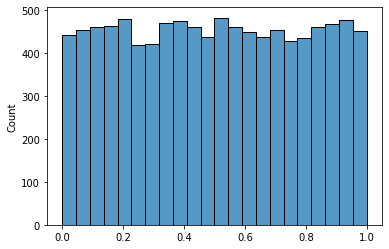

In [14]:
get_pvalue(2, 3)

# **Вывод:**
## Процент случаев, в которых нам удалось отклонить нулевую гипотезу, не превышвает 5%, а значит наша система сплитования работает корректно.